# Backorder Prediction using Machine Learning

## Backorders are unavoidable, but by anticipating which things will be backordered, eplanning can be streamlined at several levels, preventing unexpected strain on production, logistics, and transportation.  Enterprise Resource Planning (ERP) systems generate a lot of data (mainly structured) and also contain a lot of historical data; if this data can be properly utilized, a predictive model to forecast backorders and plan accordingly can be constructed. Based on past data from inventories, supply chain, and sales, we have classified the products as going into backorder (Yes or No).

## Step 1: Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

## Step 2: Loading the dataset

In [2]:
df = pd.read_csv("train.csv")

## Step 3: Top 5 and Bottom 5 values of dataset

In [3]:
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0,NaN,0,0,0,0,0,0,0,...,0,-99.00,-99.00,0,No,No,No,Yes,No,No
1,1043384,2,9.0,0,0,0,0,0,0,0,...,0,0.99,0.99,0,No,No,No,Yes,No,No
2,1043696,2,NaN,0,0,0,0,0,0,0,...,0,-99.00,-99.00,0,Yes,No,No,Yes,No,No
3,1043852,7,8.0,0,0,0,0,0,0,0,...,0,0.10,0.13,0,No,No,No,Yes,No,No
4,1044048,8,NaN,0,0,0,0,0,0,0,...,0,-99.00,-99.00,0,Yes,No,No,Yes,No,No


In [4]:
df.tail()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1048570,1407727,0,2.0,0,2,2,2,0,0,0,...,0,0.63,0.72,0,Yes,No,No,Yes,No,No
1048571,1407728,359,2.0,176,224,504,840,116,195,200,...,0,0.92,0.84,0,Yes,No,No,Yes,No,No
1048572,1407730,0,NaN,0,0,0,0,0,0,0,...,0,-99.00,-99.00,0,No,No,Yes,Yes,No,No
1048573,1407731,0,2.0,0,12,12,12,0,0,0,...,0,0.24,0.28,0,No,No,No,No,No,No
1048574,1407732,0,2.0,0,12,12,12,0,0,0,...,0,0.92,0.95,0,Yes,No,No,Yes,No,No


## Step 4: Shape of dataset

In [5]:
df.shape

(1048575, 23)

## Step 5: Description of dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1048575 non-null  int64  
 1   national_inv       1048575 non-null  int64  
 2   lead_time          984057 non-null   float64
 3   in_transit_qty     1048575 non-null  int64  
 4   forecast_3_month   1048575 non-null  int64  
 5   forecast_6_month   1048575 non-null  int64  
 6   forecast_9_month   1048575 non-null  int64  
 7   sales_1_month      1048575 non-null  int64  
 8   sales_3_month      1048575 non-null  int64  
 9   sales_6_month      1048575 non-null  int64  
 10  sales_9_month      1048575 non-null  int64  
 11  min_bank           1048575 non-null  int64  
 12  potential_issue    1048575 non-null  object 
 13  pieces_past_due    1048575 non-null  int64  
 14  perf_6_month_avg   1048575 non-null  float64
 15  perf_12_month_avg  1048575 non-n

In [7]:
df.describe()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.048575e+06,1.048575e+06,984057.000000,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.773693e+06,4.894183e+02,7.841783,4.535695e+01,1.852255e+02,3.608835e+02,5.289138e+02,5.730150e+01,1.804613e+02,3.524633e+02,5.443309e+02,5.413719e+01,3.289722e+00,-7.049983e+00,-6.618981e+00,6.324040e-01
std,3.995772e+05,2.859583e+04,7.037158,1.390535e+03,5.032302e+03,1.006764e+04,1.489545e+04,2.067927e+03,5.263481e+03,9.773354e+03,1.519565e+04,1.244245e+03,2.994339e+02,2.683685e+01,2.613766e+01,3.517768e+01
min,1.026827e+06,-1.349100e+04,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,1.373916e+06,4.000000e+00,4.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00
50%,1.810846e+06,1.500000e+01,8.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.200000e-01,8.000000e-01,0.000000e+00
75%,2.072990e+06,8.000000e+01,9.000000,0.000000e+00,5.000000e+00,1.200000e+01,2.100000e+01,4.000000e+00,1.500000e+01,3.200000e+01,4.800000e+01,3.000000e+00,0.000000e+00,9.600000e-01,9.500000e-01,0.000000e+00
max,3.284914e+06,1.233440e+07,52.000000,4.894080e+05,1.218328e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.094112e+06,2.146625e+06,3.201035e+06,3.133190e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04


## Step 6: Checking for null values

In [8]:
df.isna().sum()

sku                      0
national_inv             0
lead_time            64518
in_transit_qty           0
forecast_3_month         0
forecast_6_month         0
forecast_9_month         0
sales_1_month            0
sales_3_month            0
sales_6_month            0
sales_9_month            0
min_bank                 0
potential_issue          0
pieces_past_due          0
perf_6_month_avg         0
perf_12_month_avg        0
local_bo_qty             0
deck_risk                0
oe_constraint            0
ppap_risk                0
stop_auto_buy            0
rev_stop                 0
went_on_backorder        0
dtype: int64

## Step 7: Dropping the null values

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(984057, 23)

## Step 8: Label Encoding the non-numerical columns

In [11]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [12]:
columns_to_categorical = ['potential_issue','deck_risk','oe_constraint','ppap_risk','stop_auto_buy','rev_stop','went_on_backorder']

In [13]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode
        self.encoders = {}
    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                le = LabelEncoder()
                output[col] = le.fit_transform(output[col])
                self.encoders[col] = le
                
        else:
            for colname,col in output.iteritems():
                le = LabelEncoder()
                output[col] = le.fit_transform(output[col])
                self.encoders[colname] = le
        return output
    
    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)
    
    def invert_transform(self,X,col):
        print(self.encoders)
        return self.encoders[col].inverse_transform(X)

In [14]:
MCLE = MultiColumnLabelEncoder(columns=columns_to_categorical)
df = MCLE.fit_transform(df)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984057 entries, 1 to 1048574
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   sku                984057 non-null  int64  
 1   national_inv       984057 non-null  int64  
 2   lead_time          984057 non-null  float64
 3   in_transit_qty     984057 non-null  int64  
 4   forecast_3_month   984057 non-null  int64  
 5   forecast_6_month   984057 non-null  int64  
 6   forecast_9_month   984057 non-null  int64  
 7   sales_1_month      984057 non-null  int64  
 8   sales_3_month      984057 non-null  int64  
 9   sales_6_month      984057 non-null  int64  
 10  sales_9_month      984057 non-null  int64  
 11  min_bank           984057 non-null  int64  
 12  potential_issue    984057 non-null  int32  
 13  pieces_past_due    984057 non-null  int64  
 14  perf_6_month_avg   984057 non-null  float64
 15  perf_12_month_avg  984057 non-null  float64
 16  l

## Step 9: Visualizing the correlation between different parameters

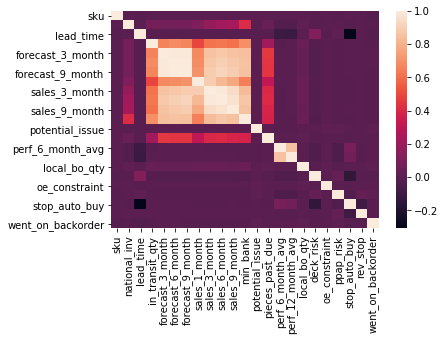

In [16]:
sb.heatmap(df.corr())

## Step 10: Normalizing the values

In [17]:
from sklearn.preprocessing import normalize

In [18]:
qty_related = ['national_inv', 'in_transit_qty', 'forecast_3_month', 
                   'forecast_6_month', 'forecast_9_month', 'min_bank',
                   'local_bo_qty', 'pieces_past_due', 'sales_1_month', 
                   'sales_3_month', 'sales_6_month', 'sales_9_month',]

In [19]:
df[qty_related] = normalize(df[qty_related], axis=1)

In [20]:
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1,1043384,1.000000,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,0,0,0,1,0,0
3,1043852,0.989949,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,0,0,0,1,0,0
5,1044198,1.000000,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.82,0.87,0.0,0,0,0,1,0,0
7,1045098,1.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.00,0.0,1,0,1,1,0,0
9,1045867,1.000000,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.82,0.87,0.0,0,0,0,1,0,0


## Step 11: Separating the dependent and independent columns

In [21]:
x = df.drop('went_on_backorder',axis=1)
y = df['went_on_backorder']

In [22]:
x.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
1,1043384,1.000000,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.99,0.99,0.0,0,0,0,1,0
3,1043852,0.989949,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.10,0.13,0.0,0,0,0,1,0
5,1044198,1.000000,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.82,0.87,0.0,0,0,0,1,0
7,1045098,1.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.00,0.00,0.0,1,0,1,1,0
9,1045867,1.000000,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.82,0.87,0.0,0,0,0,1,0


In [23]:
y.head()

1    0
3    0
5    0
7    0
9    0
Name: went_on_backorder, dtype: int32

## Step 12:  Loading the test dataset

In [24]:
test = pd.read_csv("test.csv")

In [25]:
test.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,3285085,62,NaN,0,0,0,0,0,0,0,...,0,-99.00,-99.00,0,Yes,No,No,Yes,No,No
1,3285131,9,NaN,0,0,0,0,0,0,0,...,0,-99.00,-99.00,0,No,No,Yes,No,No,No
2,3285358,17,8.0,0,0,0,0,0,0,0,...,0,0.92,0.95,0,No,No,No,Yes,No,No
3,3285517,9,2.0,0,0,0,0,0,0,0,...,0,0.78,0.75,0,No,No,Yes,Yes,No,No
4,3285608,2,8.0,0,0,0,0,0,0,0,...,0,0.54,0.71,0,No,No,No,Yes,No,No


## Step 13: Shape of the test dataset

In [26]:
test.shape

(242075, 23)

## Step 14: Description of test dataset

In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242075 entries, 0 to 242074
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   sku                242075 non-null  int64  
 1   national_inv       242075 non-null  int64  
 2   lead_time          227351 non-null  float64
 3   in_transit_qty     242075 non-null  int64  
 4   forecast_3_month   242075 non-null  int64  
 5   forecast_6_month   242075 non-null  int64  
 6   forecast_9_month   242075 non-null  int64  
 7   sales_1_month      242075 non-null  int64  
 8   sales_3_month      242075 non-null  int64  
 9   sales_6_month      242075 non-null  int64  
 10  sales_9_month      242075 non-null  int64  
 11  min_bank           242075 non-null  int64  
 12  potential_issue    242075 non-null  object 
 13  pieces_past_due    242075 non-null  int64  
 14  perf_6_month_avg   242075 non-null  float64
 15  perf_12_month_avg  242075 non-null  float64
 16  lo

## Step 15: Checking for null values

In [28]:
test.isna().sum()

sku                      0
national_inv             0
lead_time            14724
in_transit_qty           0
forecast_3_month         0
forecast_6_month         0
forecast_9_month         0
sales_1_month            0
sales_3_month            0
sales_6_month            0
sales_9_month            0
min_bank                 0
potential_issue          0
pieces_past_due          0
perf_6_month_avg         0
perf_12_month_avg        0
local_bo_qty             0
deck_risk                0
oe_constraint            0
ppap_risk                0
stop_auto_buy            0
rev_stop                 0
went_on_backorder        0
dtype: int64

In [29]:
test.dropna(inplace=True)

## Step 16: Label Encoding the non-numerical columns in test dataset

In [30]:
columns_to_categorical = ['sku','potential_issue','deck_risk','oe_constraint','ppap_risk','stop_auto_buy','rev_stop','went_on_backorder']

In [31]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode
        self.encoders = {}
    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                le = LabelEncoder()
                output[col] = le.fit_transform(output[col])
                self.encoders[col] = le
                
        else:
            for colname,col in output.iteritems():
                le = LabelEncoder()
                output[col] = le.fit_transform(output[col])
                self.encoders[colname] = le
        return output
    
    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)
    
    def invert_transform(self,X,col):
        print(self.encoders)
        return self.encoders[col].inverse_transform(X)

In [32]:
MCLE = MultiColumnLabelEncoder(columns=columns_to_categorical)
test = MCLE.fit_transform(test)

In [33]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227351 entries, 2 to 242074
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   sku                227351 non-null  int64  
 1   national_inv       227351 non-null  int64  
 2   lead_time          227351 non-null  float64
 3   in_transit_qty     227351 non-null  int64  
 4   forecast_3_month   227351 non-null  int64  
 5   forecast_6_month   227351 non-null  int64  
 6   forecast_9_month   227351 non-null  int64  
 7   sales_1_month      227351 non-null  int64  
 8   sales_3_month      227351 non-null  int64  
 9   sales_6_month      227351 non-null  int64  
 10  sales_9_month      227351 non-null  int64  
 11  min_bank           227351 non-null  int64  
 12  potential_issue    227351 non-null  int32  
 13  pieces_past_due    227351 non-null  int64  
 14  perf_6_month_avg   227351 non-null  float64
 15  perf_12_month_avg  227351 non-null  float64
 16  lo

## Step 17: Normalizing values in test dataset

In [34]:
qty_related = ['national_inv', 'in_transit_qty', 'forecast_3_month', 
                   'forecast_6_month', 'forecast_9_month', 'min_bank',
                   'local_bo_qty', 'pieces_past_due', 'sales_1_month', 
                   'sales_3_month', 'sales_6_month', 'sales_9_month',]

In [35]:
test[qty_related] = normalize(test[qty_related], axis=1)

In [36]:
test.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
2,404,1.000000,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.92,0.95,0.0,0,0,0,1,0,0
3,562,0.976187,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.78,0.75,0.0,0,0,1,1,0,0
4,648,1.000000,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.54,0.71,0.0,0,0,0,1,0,0
5,977,0.989071,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.065938,...,0.0,0.37,0.68,0.0,0,0,0,1,0,0
13,2988,1.000000,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.66,0.64,0.0,0,0,0,1,0,0


## Step 18: Separating the dependent and independent values in test dataset

In [37]:
x_test = test.drop('went_on_backorder',axis=1)
y_test = test['went_on_backorder']

## Step 19: Training the model

In [57]:
import pickle

### Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()

In [39]:
model1.fit(x,y)

LogisticRegression()

In [40]:
print("The Accuracy using Logistic Regression is :", (model1.score(x_test,y_test))*100)

The Accuracy using Logistic Regression is : 98.85463446389063


In [58]:
with open('model1_pickle','wb') as file1:
    pickle.dump(model1,file1)

### Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()

In [42]:
model2.fit(x,y)

DecisionTreeClassifier()

In [43]:
print("The Accuracy using Decision Tree is :", (model2.score(x_test,y_test))*100)

The Accuracy using Decision Tree is : 95.55665028964025


In [59]:
with open('model2_pickle','wb') as file2:
    pickle.dump(model2,file2)

### Random forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()

In [45]:
model3.fit(x,y)

RandomForestClassifier()

In [46]:
print("The Accuracy using Random Forest is :", (model3.score(x_test,y_test))*100)

The Accuracy using Random Forest is : 98.84803673614807


In [60]:
with open('model3_pickle','wb') as file3:
    pickle.dump(model3,file3)

### Support Vector Machine (SVC)

In [47]:
from sklearn.svm import SVC
model4 = SVC()

In [48]:
model4.fit(x,y)

SVC()

In [49]:
print("The Accuracy using SVM is :", (model4.score(x_test,y_test))*100)

The Accuracy using SVM is : 98.85463446389063


In [61]:
with open('model4_pickle','wb') as file4:
    pickle.dump(model4,file4)

### Naives Bayes

In [50]:
from sklearn.naive_bayes import GaussianNB
model5 = GaussianNB()

In [51]:
model5.fit(x,y)

GaussianNB()

In [52]:
print("The Accuracy using Naive Bayes is :", (model5.score(x_test,y_test))*100)

The Accuracy using Naive Bayes is : 98.85463446389063


In [62]:
with open('model5_pickle','wb') as file5:
    pickle.dump(model5,file5)

### XGboost

In [53]:
from xgboost import XGBClassifier
model6 = XGBClassifier()

In [54]:
model6.fit(x,y)

C:\Users\soham\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:38:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [55]:
print("The Accuracy using XGBoost is :", (model6.score(x_test,y_test))*100)

The Accuracy using XGBoost is : 98.41082731107407


In [63]:
with open('model6_pickle','wb') as file6:
    pickle.dump(model6,file6)

## Step 20: Getting Accuracy of various models used

In [56]:
print("1. Logistic Regression: ",model1.score(x_test,y_test)*100)
print("2. Decision Tree      : ",model2.score(x_test,y_test)*100)
print("3. Random Forest      : ",model3.score(x_test,y_test)*100)
print("4. SVM                : ",model4.score(x_test,y_test)*100)
print("5. Naive Bayes        : ",model5.score(x_test,y_test)*100)
print("6. XGBoost            : ",model6.score(x_test,y_test)*100)

1. Logistic Regression:  98.85463446389063
2. Decision Tree      :  95.55665028964025
3. Random Forest      :  98.84803673614807
4. SVM                :  98.85463446389063
5. Naive Bayes        :  98.85463446389063
6. XGBoost            :  98.41082731107407


## Step 21: Making predictions on test dataset

In [72]:
y_predicted = model6.predict(x_test)
y_predicted

array([0, 0, 0, ..., 0, 0, 0])

## Step 22: Visualizing the score

In [73]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[223095,   1652],
       [  1961,    643]], dtype=int64)

Text(33.0, 0.5, 'Truth')

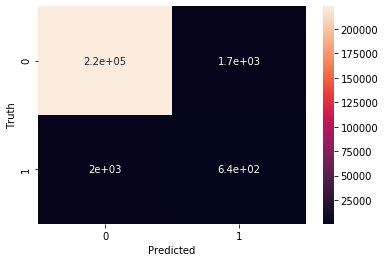

In [74]:
import seaborn as sb
plt.figure(figsize=(6,4))
sb.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [75]:
import sklearn.metrics as metrics

print('Confusion matrix \n')
print(metrics.confusion_matrix(y_test,y_predicted))
print('*'*80)
print('\n')
print('Classification report \n')
print(metrics.classification_report(y_test,y_predicted))

Confusion matrix 

[[223095   1652]
 [  1961    643]]
********************************************************************************


Classification report 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    224747
           1       0.28      0.25      0.26      2604

    accuracy                           0.98    227351
   macro avg       0.64      0.62      0.63    227351
weighted avg       0.98      0.98      0.98    227351



# End